# Assignment 2 Distribution Grid Simulation

## Notebook A

### Task 1

- Create with pandapower the distribution grid depicted below in figure 1
- Ressources:
    - online docs https://pandapower.readthedocs.io/en/latest/index.html

### Task 2

- Load the Dataset A for generation and load and perform a time series simulation.

- Ressources:
    - https://pandapower.readthedocs.io/en/latest/timeseries.html

### Task 3

- Explore how the allocation of the loads and generating elements influence the lines and external grid

![](fig_grid_A.png)
### Grid A

In [1]:
import pandapower as pp
import pandapower.plotting as plot
import pandas as pd

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# create empty net
net = pp.create_empty_network()

# create buses
b1 = pp.create_bus(net, vn_kv=20.0, name="Bus 1")
b2 = pp.create_bus(net, vn_kv=0.4, name="Bus 2")
b3 = pp.create_bus(net, vn_kv=0.4, name="Bus 3")

# create bus elements
pp.create_ext_grid(net, bus=b1, vm_pu=1.02, name="Grid Connection")
pp.create_load(net, bus=b2, p_mw=0.01, q_mvar=0.005, name="Load")
pp.create_load(net, bus=b3, p_mw=0.01, q_mvar=0.005, name="Load")
pp.create_sgen(net, bus=b2, p_mw=0.01, q_mvar=0.005, name="Load")
pp.create_sgen(net, bus=b3, p_mw=0.01, q_mvar=0.005, name="Load")

# create branch elements
tid = pp.create_transformer(
    net, hv_bus=b1, lv_bus=b2, std_type="0.4 MVA 20/0.4 kV", name="Trafo"
)
pp.create_line(
    net, from_bus=b2, to_bus=b3, length_km=0.100, name="Line", std_type="NAYY 4x50 SE"
)

0

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


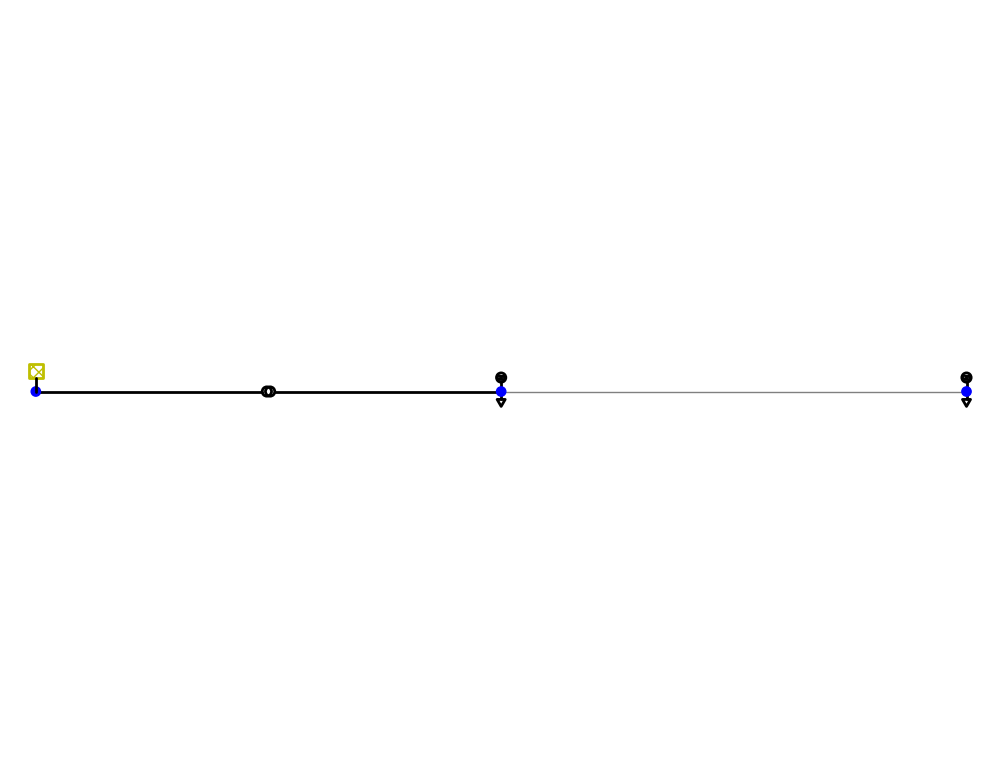

<Axes: >

In [3]:
plot.simple_plot(net, plot_loads=True, plot_sgens=True)

In [4]:
pp.runpp(net)
net.res_ext_grid

,p_mw,q_mvar
0,0.001405,-9.600074e-07


In [5]:
# load the dataframes from csv files
gen_data = pd.read_csv("GenerationData_A.csv", index_col=0)
gen_data.columns.name = "household"
load_data = pd.read_csv("LoadData_A.csv", index_col=0)
load_data.columns.name = "household"
load_data

household,0,1
0,0.000166,0.000163
1,0.000161,0.000170
2,0.000172,0.000161
3,0.000162,0.000181
4,0.000168,0.000173
5,0.000171,0.000323
6,0.000167,0.000180
7,0.000131,0.000143
8,0.000120,0.000192
9,0.000279,0.000225


<Axes: title={'center': 'Load Data'}, xlabel='Time of the Day [h]', ylabel='Load [MW]'>

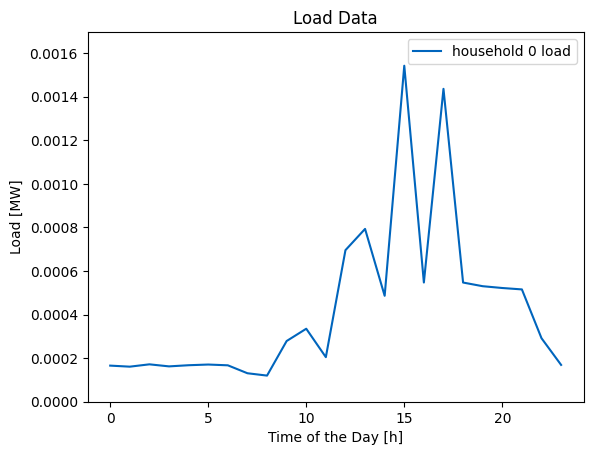

In [6]:
# plot load data 
load_data['0'].plot(legend=True, title="Load Data", xlabel="Time of the Day [h]", ylabel="Load [MW]", ylim=(0, 1.1 * load_data.max().max()), color=(0/255,101/255,189/255), label="household 0 load")

<Axes: title={'center': 'Generation Data'}, xlabel='Time of the Day [h]', ylabel='Generation [MW]'>

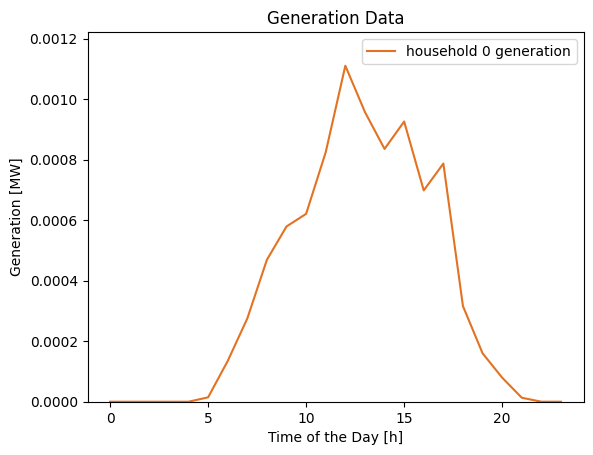

In [7]:
# plot generation data
gen_data['0'].plot(legend=True, title="Generation Data", xlabel="Time of the Day [h]", ylabel="Generation [MW]", ylim=(0, 1.1 * gen_data.max().max()), color=(227/255,114/255,34/255), label="household 0 generation")

In [8]:
from utils import run_time_series

In [9]:
res_ext_1, res_lines_1 = run_time_series(
    gen_data,
    load_data,
    net,
    index_order_load=[0, 1],
    index_order_gen=[0, 1],
)
res_ext_2, res_lines_2 = run_time_series(
    gen_data,
    load_data,
    net,
    index_order_load=[1, 0],
    index_order_gen=[1, 0],
)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 150.86it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 123.25it/s]


In [10]:
res_lines_1.max(axis=1).sum()

6.668227537708811

In [11]:
res_lines_2.max(axis=1).sum()

7.043080869868007

In [12]:
all(res_lines_1.max(axis=1) <= 100)

True

<Axes: title={'center': 'Line Loading'}, xlabel='Time of the Day [h]', ylabel='Line Loading [%]'>

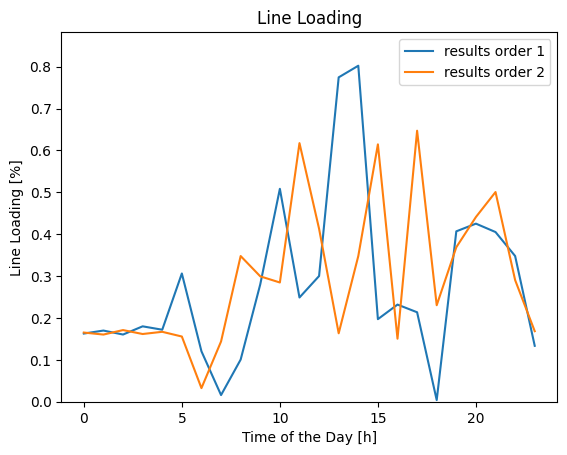

In [13]:
# plot res lines in one plot with legend
ax=res_lines_1['0'].plot(label="results order 1",legend=True, title="Line Loading", xlabel="Time of the Day [h]", ylabel="Line Loading [%]", ylim=(0, 1.1 * res_lines_1.max().max()))
res_lines_2['0'].plot(ax=ax, legend=True, title="Line Loading", xlabel="Time of the Day [h]", ylabel="Line Loading [%]", ylim=(0, 1.1 * res_lines_1.max().max()),label="results order 2")